In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", font_scale=1.2, palette="muted")
plt.rcParams["figure.figsize"] = [12, 4]

<Axes: title={'center': 'Weekends'}>

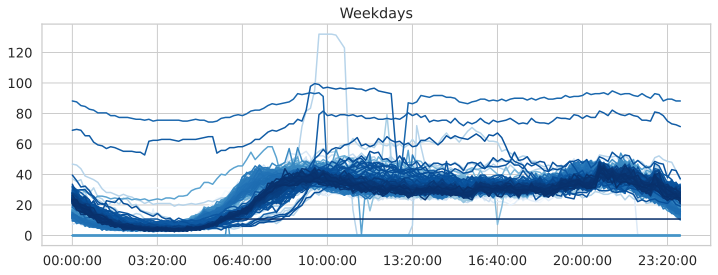

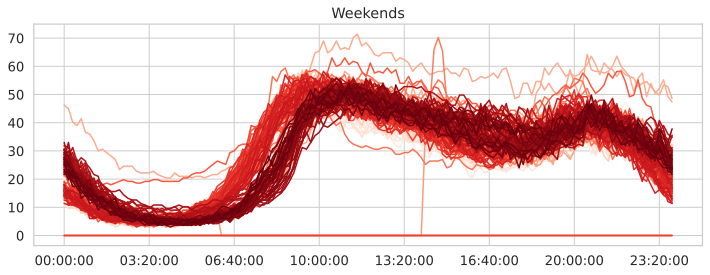

In [2]:
import dask
import dask.dataframe
waterworks = dask.dataframe.read_csv("../data/water_consumption_profiles.csv", parse_dates=['date']).compute()
waterworks.weekday = waterworks["date"].dt.weekday < 5

waterworks651 = waterworks.iloc[:, 1:]
waterworks651[waterworks.weekday].T.plot(legend=None, colormap="Blues", title="Weekdays")
waterworks651[~waterworks.weekday].T.plot(legend=None, colormap="Reds", title="Weekends")

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
	waterworks651.values,
	waterworks.weekday.values.astype(int),
	test_size=0.2,
	random_state=36
)

## K-Means Clustering

CPU times: user 279 ms, sys: 34.6 ms, total: 314 ms
Wall time: 360 ms


<Axes: >

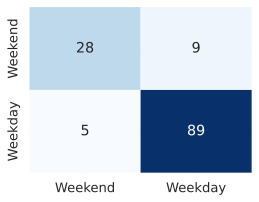

In [4]:
%%time
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Confusion Matrix
cm = confusion_matrix(kmeans.predict(X_test), y_test)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=["Weekend", "Weekday"], yticklabels=["Weekend", "Weekday"], cbar=False)

## DBA-K-Means Clustering

CPU times: user 13.4 s, sys: 1.24 s, total: 14.6 s
Wall time: 15.3 s


<Axes: >

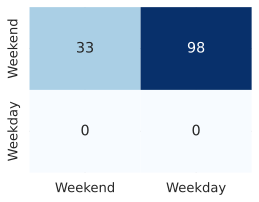

In [5]:
%%time
from tslearn.clustering import TimeSeriesKMeans
kmeans = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42) #euclidean works
kmeans.fit(X_train)

# Confusion Matrix
cm = confusion_matrix(kmeans.predict(X_test), y_test)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=["Weekend", "Weekday"], yticklabels=["Weekend", "Weekday"], cbar=False)

In [6]:
kmeans.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Moving Averge Smoothing

In [7]:
smoothworks651 = waterworks651.rolling(window=2, min_periods=1).mean()

X_train, X_test, y_train, y_test = train_test_split(
	smoothworks651.values,
	waterworks.weekday.values.astype(int),
	test_size=0.2,
	random_state=36
)

<Axes: >

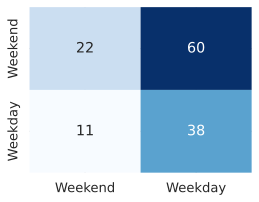

In [8]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(X_train)

# Confusion Matrix
cm = confusion_matrix(kmeans.predict(X_test), y_test)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=["Weekend", "Weekday"], yticklabels=["Weekend", "Weekday"], cbar=False)

<Axes: >

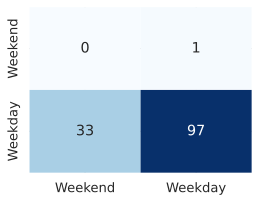

In [9]:
kmeans = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=42) #euclidean works
kmeans.fit(X_train)

# Confusion Matrix
cm = confusion_matrix(kmeans.predict(X_test), y_test)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=["Weekend", "Weekday"], yticklabels=["Weekend", "Weekday"], cbar=False)

## Arrowhead Clustering

In [10]:
import numpy as np
import dask.dataframe

arrowheads = dask.dataframe.from_array(np.loadtxt("../data/ArrowHead_TRAIN.txt")[:,1:]).compute()

<Axes: >

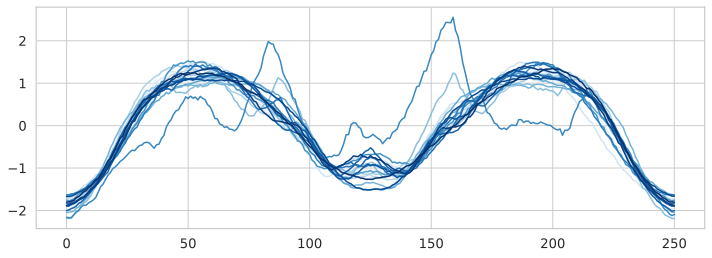

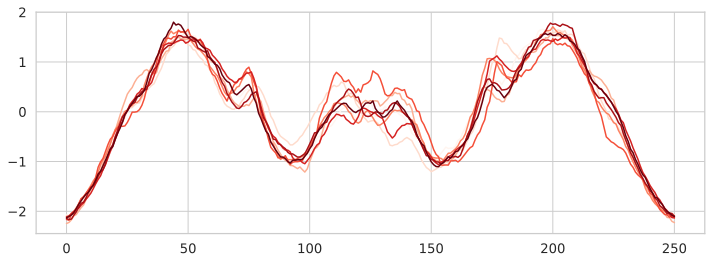

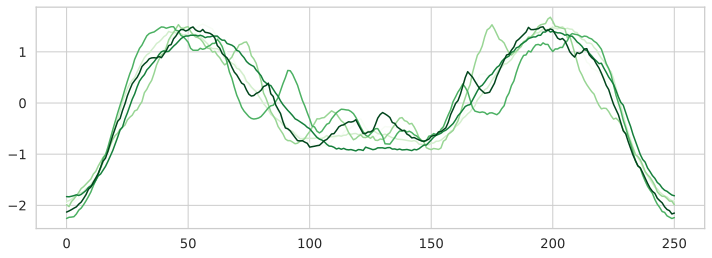

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(arrowheads.values)
arrowheads[clusters == 0].T.plot(legend=None, colormap="Blues")
arrowheads[clusters == 1].T.plot(legend=None, colormap="Reds")
arrowheads[clusters == 2].T.plot(legend=None, colormap="Greens")

<Axes: >

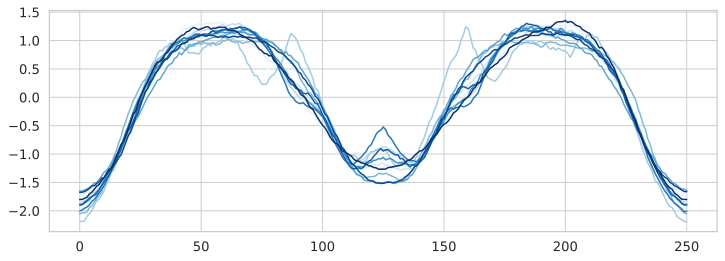

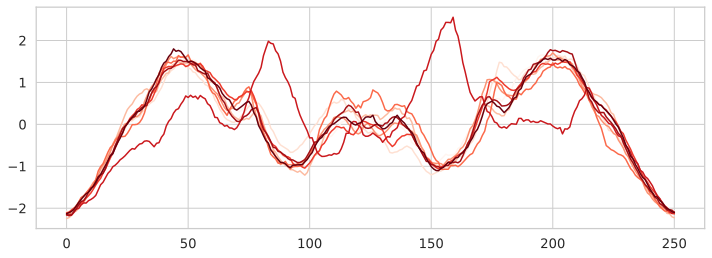

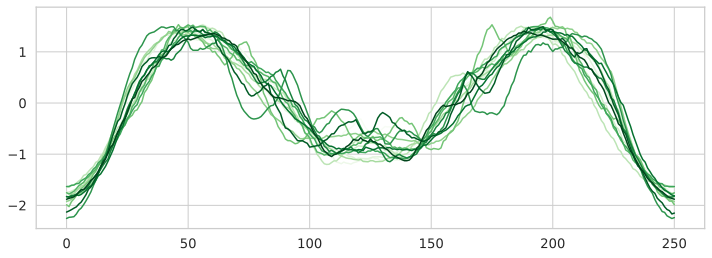

In [12]:
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=42)
clusters = kmeans.fit_predict(arrowheads.values)
arrowheads[clusters == 0].T.plot(legend=None, colormap="Blues")
arrowheads[clusters == 1].T.plot(legend=None, colormap="Reds")
arrowheads[clusters == 2].T.plot(legend=None, colormap="Greens")

 ## Basic Motions Clustering

In [42]:
from scipy.io import arff
data, meta = arff.loadarff("../data/BasicMotions/BasicMotionsDimension1_TRAIN.arff")
basicmotions = dask.dataframe.from_array(data).iloc[:,:-1].compute()

<Axes: >

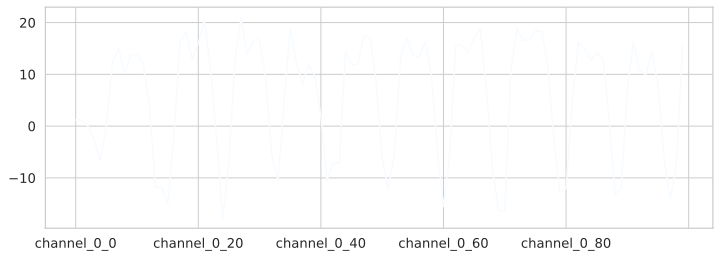

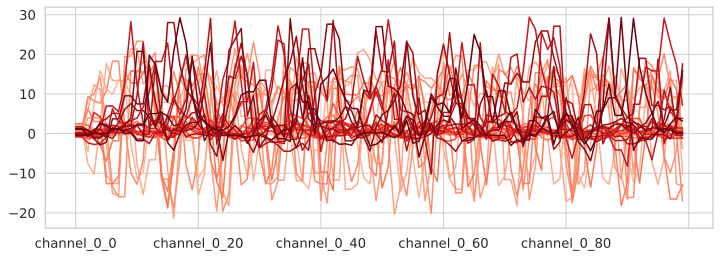

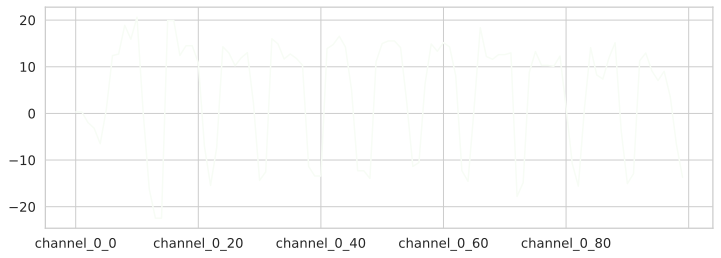

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(basicmotions.values)
basicmotions[clusters == 0].T.plot(legend=None, colormap="Blues")
basicmotions[clusters == 1].T.plot(legend=None, colormap="Reds")
basicmotions[clusters == 2].T.plot(legend=None, colormap="Greens")

<Axes: >

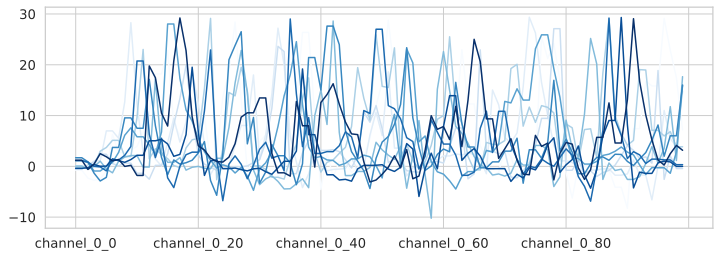

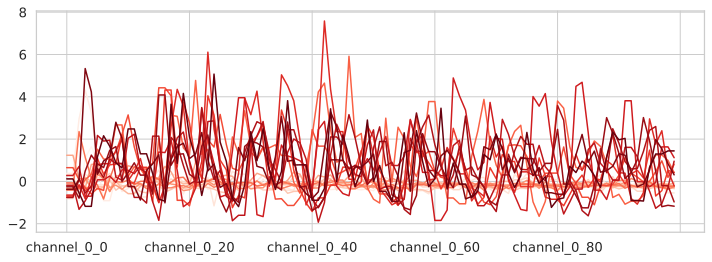

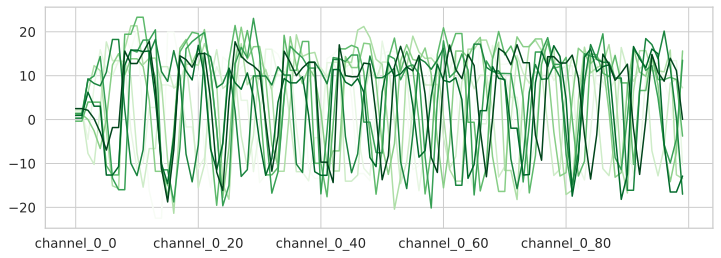

In [53]:
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=42)
clusters = kmeans.fit_predict(basicmotions.values)
basicmotions[clusters == 0].T.plot(legend=None, colormap="Blues")
basicmotions[clusters == 1].T.plot(legend=None, colormap="Reds")
basicmotions[clusters == 2].T.plot(legend=None, colormap="Greens")